# Preparing time series from wide form data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [2]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

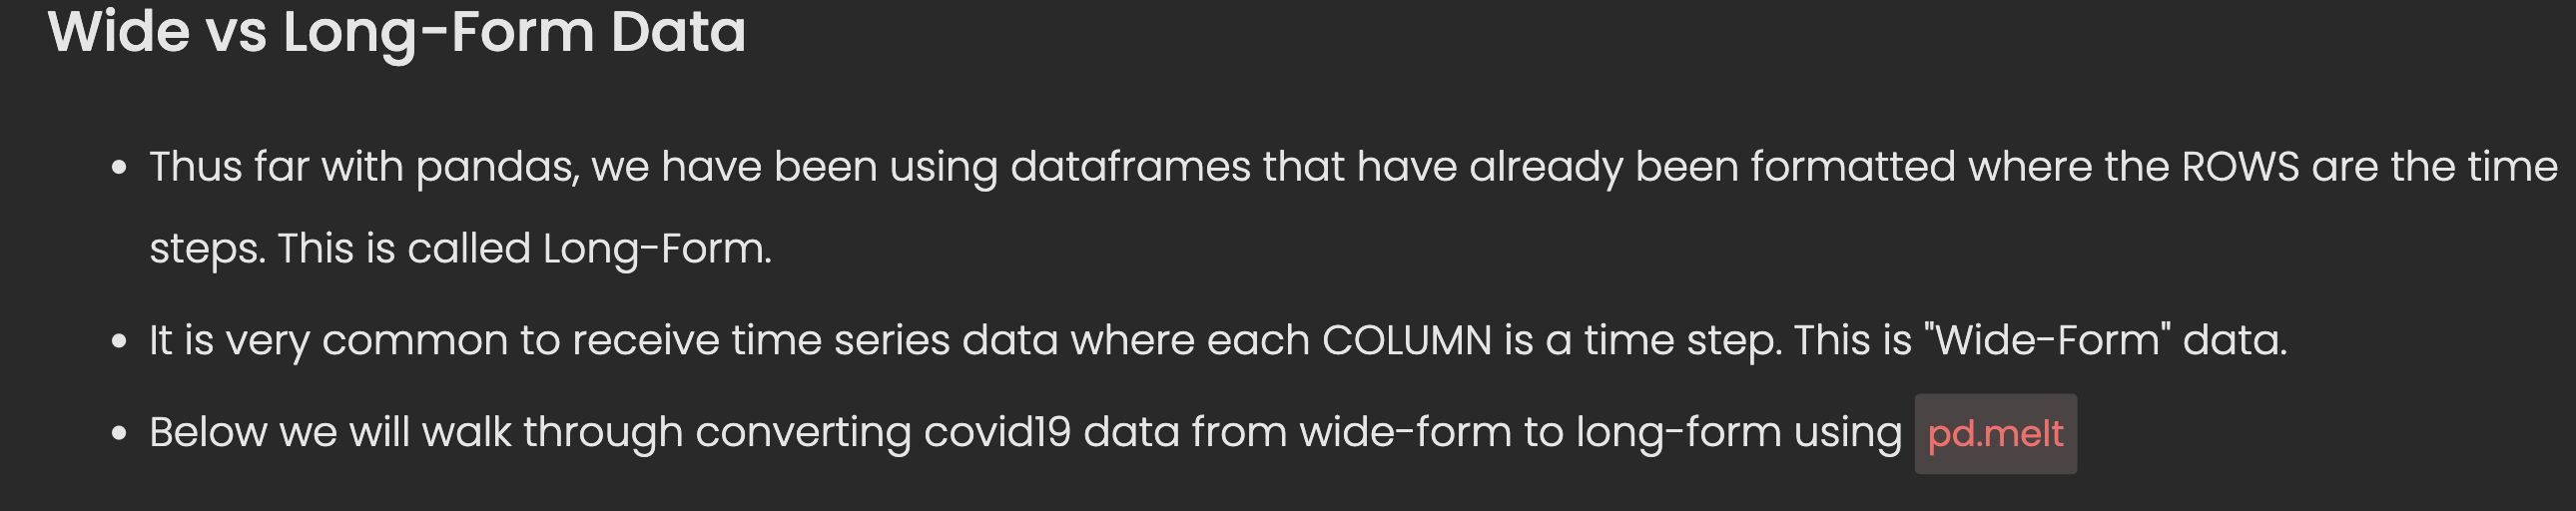

# Wide form - Covid 19 case

In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtZ3XGbdzViSOsO6Gam4LQAQTSrFMXSAz_CIcBmmQYBv9uuggbGcxUuqXtMeUPiHR9NyI6At3apf5d/pub?output=csv"
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22,7/1/22,7/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181987,182033,182072,182149,182228,182324,182403,182528,182594,182643
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,278211,278504,278793,279077,279077,279167,280298,280851,281470,282141
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266015,266025,266030,266038,266049,266062,266073,266087,266105,266115
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43774,43774,43774,43774,43774,43774,43774,43774,44177,44177
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,101320,101320,101320,101320,101320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,658503,658503,658503,658503,659853,659853,659853,659853,659853,659853
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11824,11824,11824,11824,11824,11824,11824,11824,11824,11824
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,324922,325110,325110,325110,325348,325498,325498,325857,325857,325857


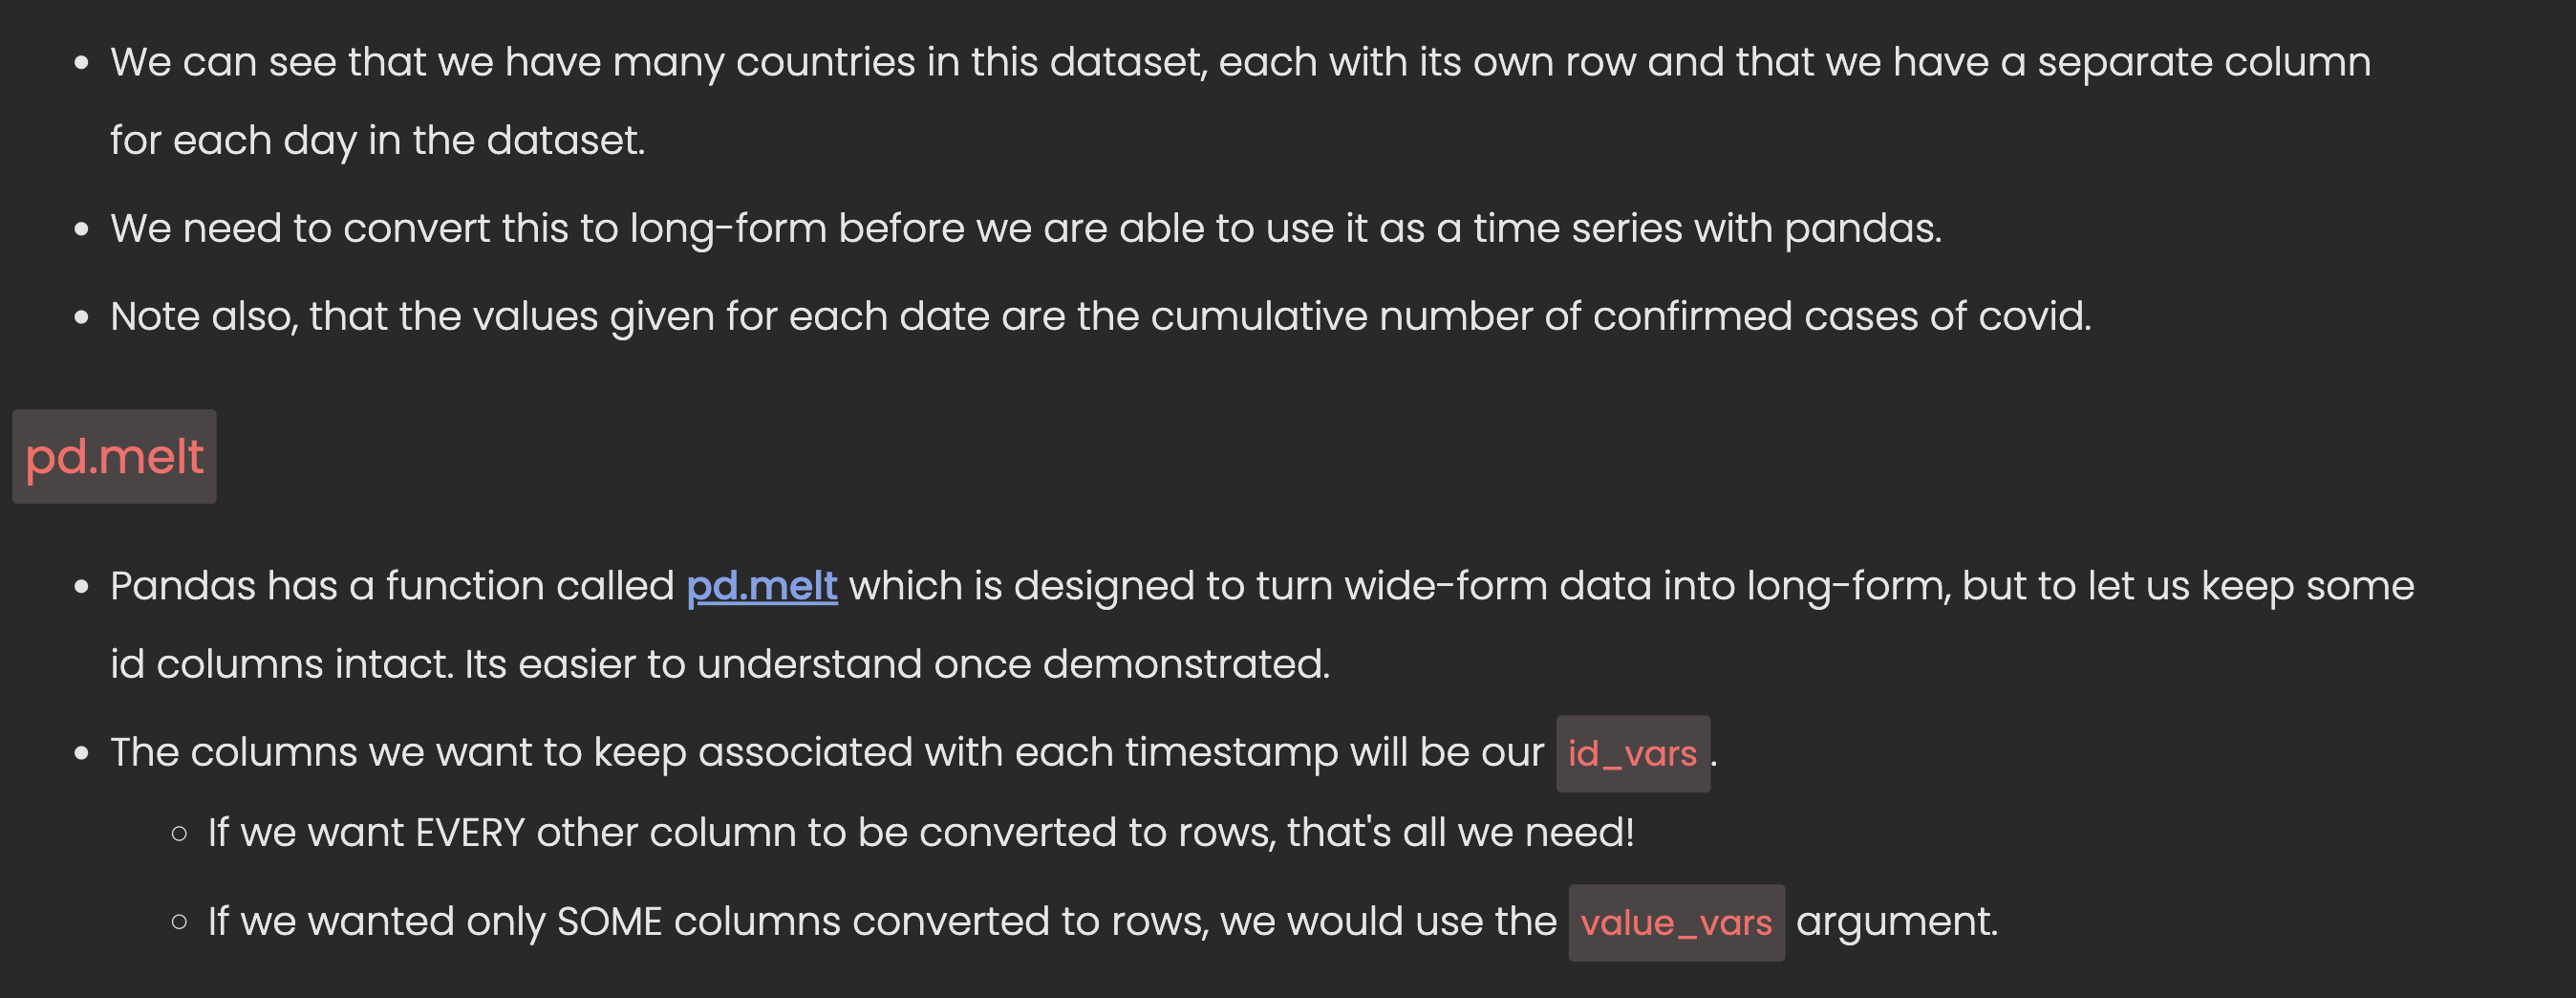

In [4]:
#Let's take a look at the existing columns:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/23/22', '6/24/22', '6/25/22', '6/26/22', '6/27/22', '6/28/22',
       '6/29/22', '6/30/22', '7/1/22', '7/2/22'],
      dtype='object', length=897)

In [5]:
# plan to only keep few cols to bbegin
melted = pd.melt(df,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'] )
melted

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
254500,NaN,West Bank and Gaza,31.952200,35.233200,7/2/22,659853
254501,NaN,Winter Olympics 2022,39.904200,116.407400,7/2/22,535
254502,NaN,Yemen,15.552727,48.516388,7/2/22,11824
254503,NaN,Zambia,-13.133897,27.849332,7/2/22,325857


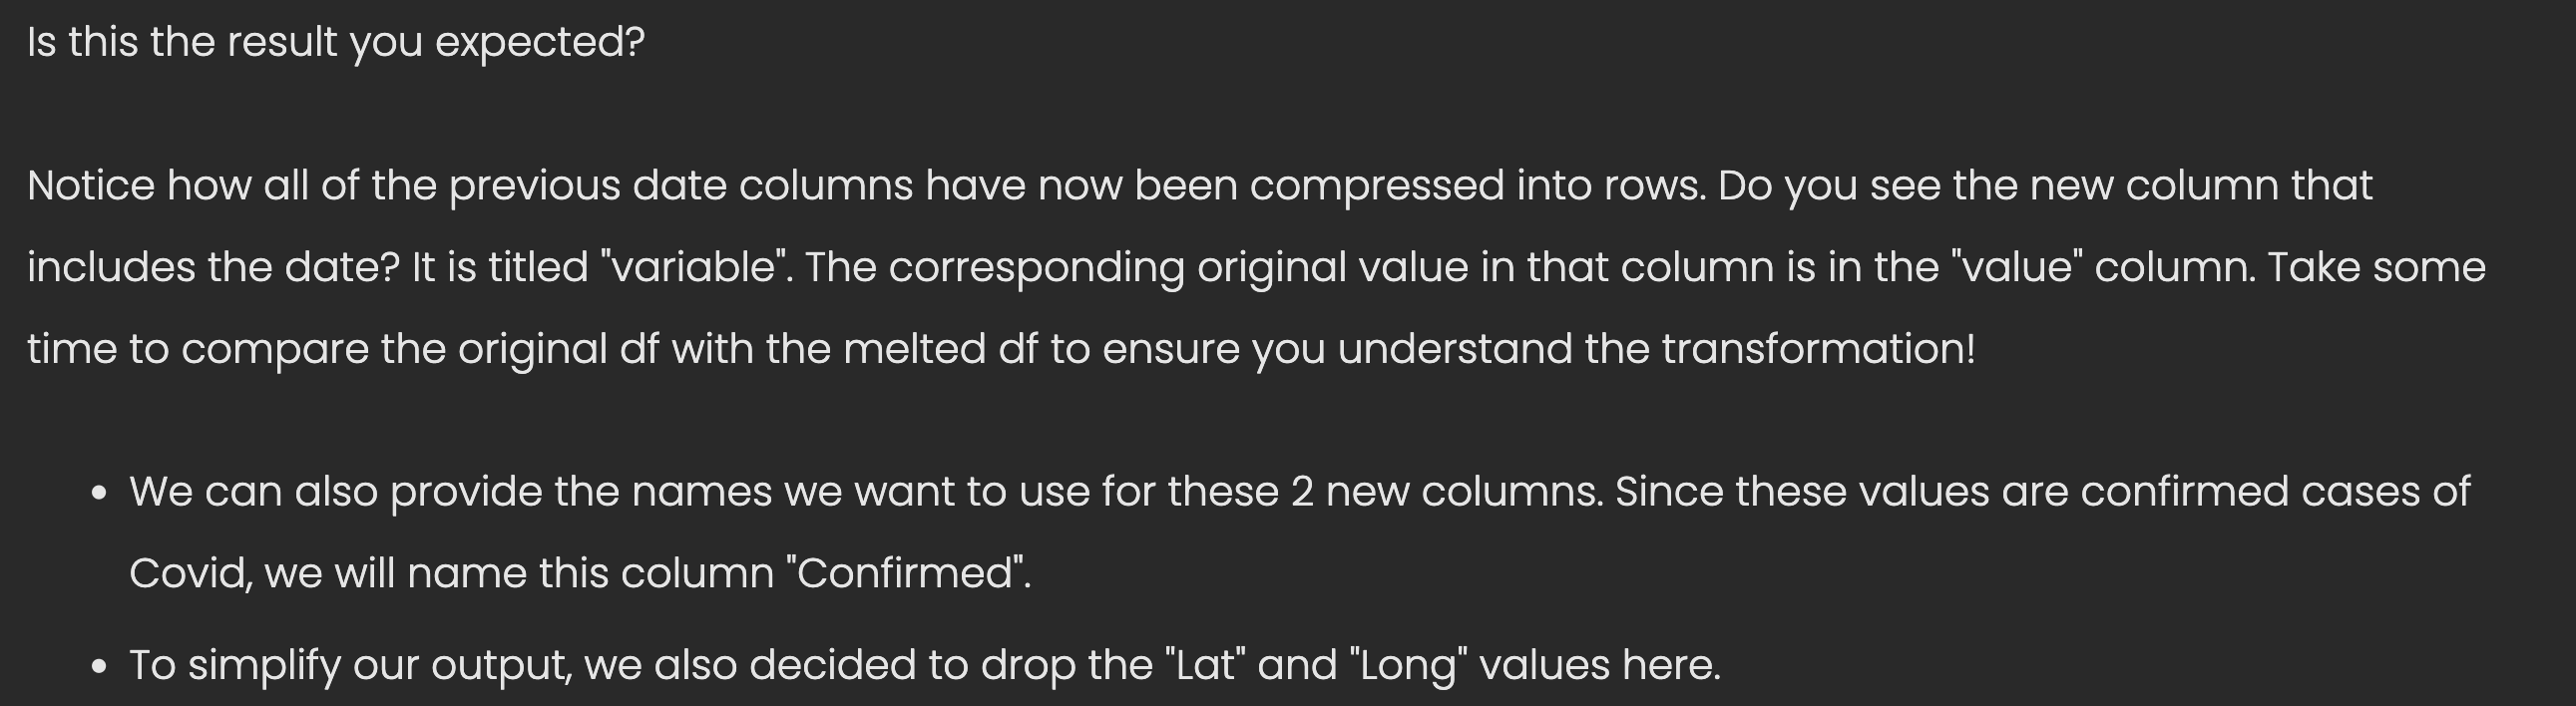

In [6]:
melted = pd.melt(df.drop(columns=['Lat','Long']),
                 id_vars=['Province/State', 'Country/Region'],
                value_name='Confirmed',var_name="Date")
melted

,Province/State,Country/Region,Date,Confirmed
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0
...,...,...,...,...
254500,NaN,West Bank and Gaza,7/2/22,659853
254501,NaN,Winter Olympics 2022,7/2/22,535
254502,NaN,Yemen,7/2/22,11824
254503,NaN,Zambia,7/2/22,325857


## slice out info we want

In [7]:
# date to datetime
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254505 entries, 0 to 254504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  79477 non-null   object        
 1   Country/Region  254505 non-null  object        
 2   Date            254505 non-null  datetime64[ns]
 3   Confirmed       254505 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.8+ MB


In [8]:
# date to index
melted = melted.set_index("Date")
melted

,Province/State,Country/Region,Confirmed
Date,,,
2020-01-22,NaN,Afghanistan,0
2020-01-22,NaN,Albania,0
2020-01-22,NaN,Algeria,0
2020-01-22,NaN,Andorra,0
2020-01-22,NaN,Angola,0
...,...,...,...
2022-07-02,NaN,West Bank and Gaza,659853
2022-07-02,NaN,Winter Olympics 2022,535
2022-07-02,NaN,Yemen,11824


In [9]:
# what if we resample?
# take a look at what happens when we resample
melted.resample("D").sum()

#We now have the sum of all cases for each day, BUT what information have we lost? 
#data broken down by country, but when resampled, all data for each day were combined into 
#a single result. We will explore how can we resample while maintaining the original granularity 
#of our data in the next section.

/var/folders/dj/tq7kx_ys6m161zqrzvh_73q80000gn/T/ipykernel_17983/102191320.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melted.resample("D").sum()


,Confirmed
Date,
2020-01-22,557
2020-01-23,657
2020-01-24,944
2020-01-25,1437
2020-01-26,2120
...,...
2022-06-28,545535742
2022-06-29,546470126
2022-06-30,547500950


# Combining .groupby and .resample for groupwise- time series processing
Our data is broken down by country. Let's take a look at how many countries are included.

In [10]:
## There are 199 unique countries included
melted['Country/Region'].nunique()

199

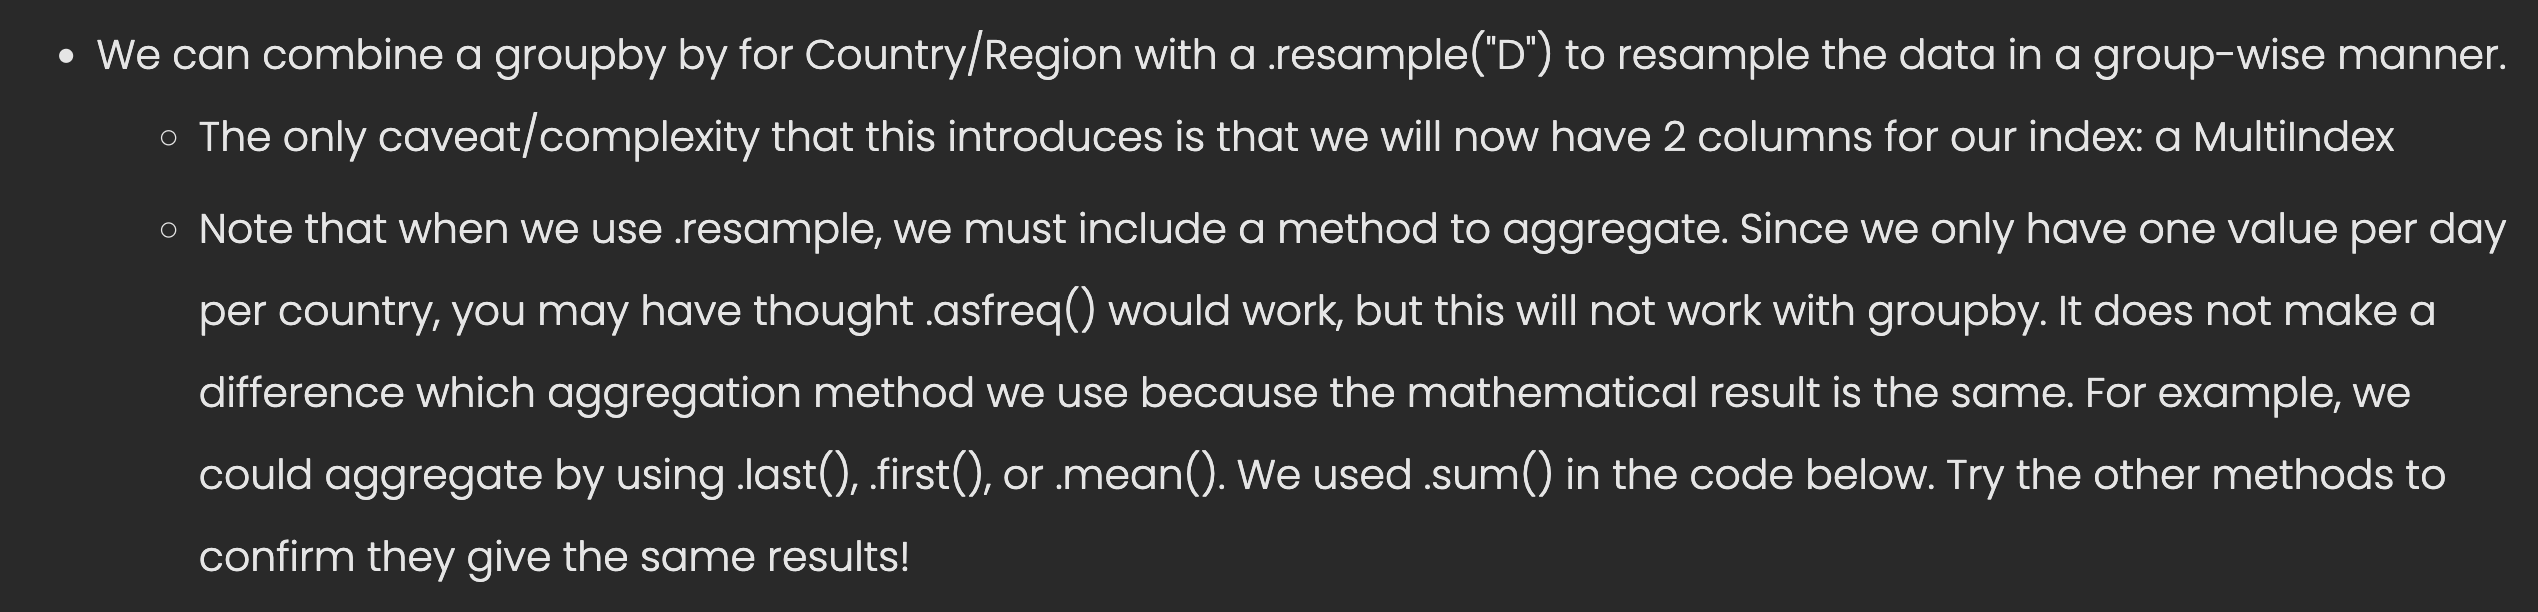

In [11]:
df_ts = melted.groupby('Country/Region').resample("D").sum()
df_ts

/var/folders/dj/tq7kx_ys6m161zqrzvh_73q80000gn/T/ipykernel_17983/3786208214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('Country/Region').resample("D").sum()


Confirmed
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Zimbabwe       2022-06-28     255383
               2022-06-29     255520
               2022-06-30     255586
               2022-07-01     255586
               2022-07-02     255586

[177707 rows x 1 columns]

In [12]:
df_ts.head().index

MultiIndex([('Afghanistan', '2020-01-22'),
            ('Afghanistan', '2020-01-23'),
            ('Afghanistan', '2020-01-24'),
            ('Afghanistan', '2020-01-25'),
            ('Afghanistan', '2020-01-26')],
           names=['Country/Region', 'Date'])

In [13]:
#Notice, though, that we have maintained our ability to locate information for particular countries!

df_ts.loc['Afghanistan']

,Confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2022-06-28,182324
2022-06-29,182403
2022-06-30,182528


## Filtering by Date with a MultiIndex using pd.IndexSlice

we can use pd.IndexSlice with .loc to filter for all values in 2020.

In [14]:
df_ts.loc[pd.IndexSlice[:, '2020'],:]

Confirmed
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Zimbabwe       2020-12-27      13077
               2020-12-28      13148
               2020-12-29      13325
               2020-12-30      13625
               2020-12-31      13867

[68655 rows x 1 columns]

In [15]:
#We can also filter by both date and country. Afghanistan to Algeria (alphabetically)  for 2020:
df_ts.loc[pd.IndexSlice['Afghanistan':'Algeria','2020'],:]

Confirmed
Country/Region Date                 
Afghanistan    2020-01-22          0
               2020-01-23          0
               2020-01-24          0
               2020-01-25          0
               2020-01-26          0
...                              ...
Algeria        2020-12-27      98249
               2020-12-28      98631
               2020-12-29      98988
               2020-12-30      99311
               2020-12-31      99610

[1035 rows x 1 columns]

## Plotting with a MultiIndex
Let's go ahead and visualize the time series data! Specifically, let's plot the number of Confirmed Cases for several countries in North America (US, Mexico, Canada).

In [16]:
countries = ['Canada','Mexico','US']
plot_df = df_ts.loc[countries].copy()
plot_df

Confirmed
Country/Region Date                 
Canada         2020-01-22          0
               2020-01-23          2
               2020-01-24          3
               2020-01-25          3
               2020-01-26          3
...                              ...
US             2022-06-28   87296327
               2022-06-29   87490815
               2022-06-30   87627486
               2022-07-01   87821971
               2022-07-02   87838623

[2679 rows x 1 columns]

## Using unstack() for Plotting with a MultiIndex

Understanding Index Levels
Right now, we have a multi-index with 2 levels.
Level 0 (the outer-most index on the left): Country
Level 1 (the next/inner index): Date
To demonstrate, let's use the df.index.get_level_values() function to get the values from 1 index at a time.

In [17]:
# level 0 is Country/Region
plot_df.index.get_level_values(0)

Index(['Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada',
       ...
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US'],
      dtype='object', name='Country/Region', length=2679)

In [18]:
# level 1 is Date
plot_df.index.get_level_values(1)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=2679, freq=None)

## Applying unstack() for Our Visualization

- Unstack accepts a "level" argument for which level of our multi-index should be converted into columns.
- Since we want the outermost index (level 0) to become the columns, we will need to specify level=0.

In [19]:
unstacked = plot_df.unstack(level=0)
unstacked

Confirmed                   
Country/Region    Canada   Mexico        US
Date                                       
2020-01-22             0        0         1
2020-01-23             2        0         1
2020-01-24             3        0         2
2020-01-25             3        0         2
2020-01-26             3        0         5
...                  ...      ...       ...
2022-06-28       3945493  5986917  87296327
2022-06-29       3948112  5986917  87490815
2022-06-30       3954275  6034602  87627486
2022-07-01       3955704  6058689  87821971
2022-07-02       3956897  6058689  87838623

[893 rows x 3 columns]

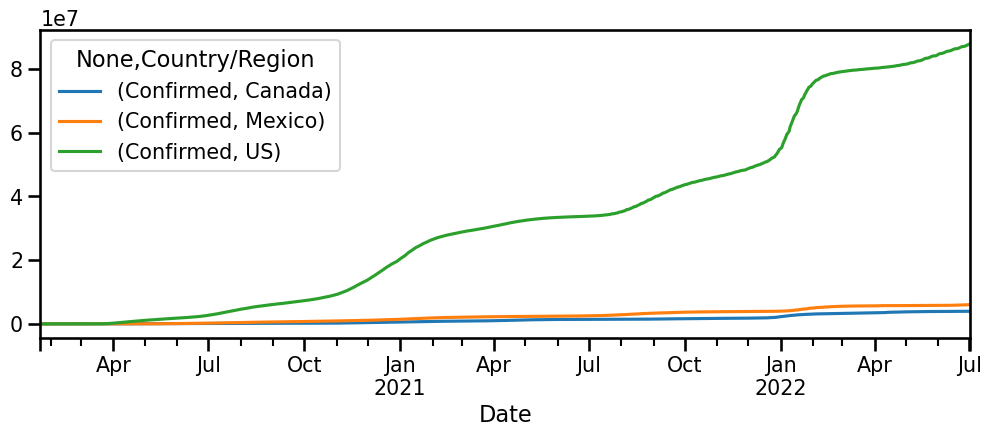

In [20]:
ax = unstacked.plot()

- And there we go! We were able to plot each country as a separate line.

- The one remaining issue is our legend.
    - Why do we now have (Confirmed, CountryName) for all of the countries?
    
- If we take a look at the columns of our unstacked dataframe, we will see that we have now created a MultiIndex.

In [21]:
unstacked.columns

MultiIndex([('Confirmed', 'Canada'),
            ('Confirmed', 'Mexico'),
            ('Confirmed',     'US')],
           names=[None, 'Country/Region'])

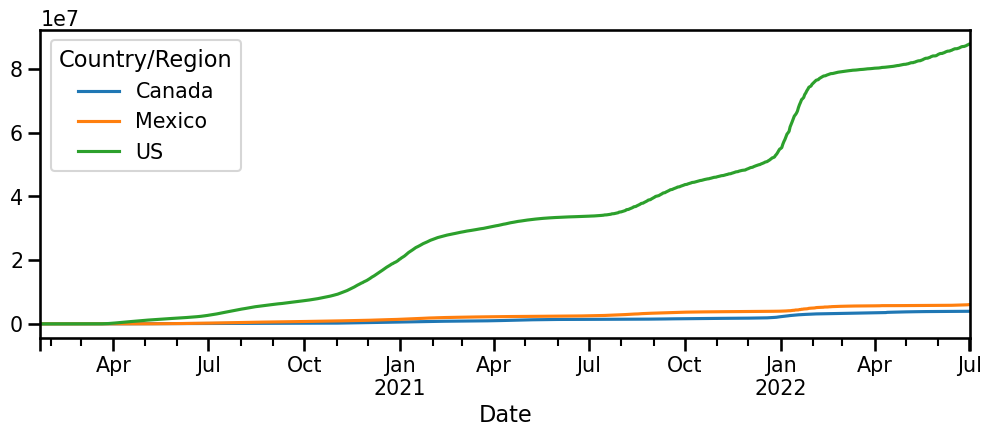

In [22]:
#By slicing out the "Confirmed" column from our multi-index before we plot, 
#we will have bypassed the outer level of our MultiIndex, 
#so we will not see the "Confirmed" column name appear in our legend.
ax = unstacked['Confirmed'].plot()

# Selecting 1 Country to Analyze

To continue our exploration of the data, let's separate the US from the rest of the datasets (but keep all the dates).

In [23]:
ts_us = df_ts.loc['US', 'Confirmed']
ts_us.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=893, freq='D')

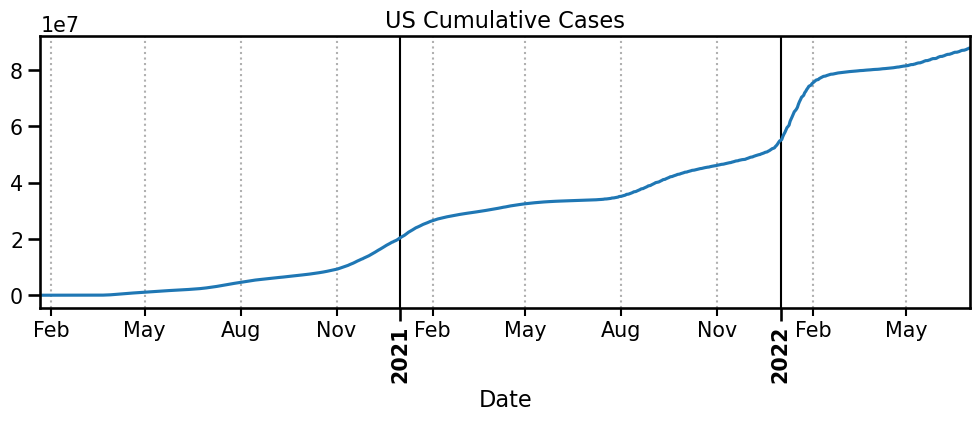

In [24]:
ax = ts_us.plot(style='-',title="US Cumulative Cases");
format_xdates(ax);

## Drilling Down into the US
We want to get a more detailed view of what happening in specific states in the U.S.

Slice out just values for the US into a new dataframe.
Check the Province/State column for us states

In [25]:
## check for states
df_us = melted[melted['Country/Region']=='US']
df_us

,Province/State,Country/Region,Confirmed
Date,,,
2020-01-22,NaN,US,1
2020-01-23,NaN,US,1
2020-01-24,NaN,US,2
2020-01-25,NaN,US,2
2020-01-26,NaN,US,5
...,...,...,...
2022-06-28,NaN,US,87296327
2022-06-29,NaN,US,87490815
2022-06-30,NaN,US,87627486


In [ ]:
df_us['Province/State'].unique()

#Unfortunately, this dataset doesn't include the level of detail we want!
#To explore Covid cases by state, we will use a different data set.
#We will start the state-based analysis in the next lesson.

# Summary
This lesson demonstrated a wide-form data set and how to convert it to long form. Once in long-form, we created a multiIndex which allowed us to keep our data grouped by country as well as date. We filtered and sliced using our multiIndex and learned how to unstack our dataframe to make plots with a multiIndex.